In [354]:
from pandas_datareader import data
import yfinance as yf
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [355]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [356]:

def fetch_stock_data(tickers, start_date, end_date):
    stock_data = yf.download(tickers, start, end)
    return stock_data

DF = fetch_stock_data(tickers, start, end);
DF

[*********************100%%**********************]  6 of 6 completed


Adj Close                                                \
                  BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  31.943676  335.203979   97.395271  24.795879  33.259640   
2006-01-04  31.604429  329.015320   96.050003  24.652769  33.282455   
2006-01-05  31.645128  330.647522   96.012207  24.727438  33.373730   
2006-01-06  31.597645  330.647522   97.372643  24.901653  33.407951   
2006-01-09  31.618002  329.083313   98.544044  25.306101  33.761585   
...               ...         ...         ...        ...        ...   
2015-12-24  14.451779   41.575333  154.323410  52.805664  25.817499   
2015-12-28  14.334624   41.315052  153.604523  52.631237  25.571093   
2015-12-29  14.460146   41.788307  155.219894  53.178326  25.873142   
2015-12-30  14.267679   41.251968  153.934418  52.797741  25.618786   
2015-12-31  14.083581   40.818146  152.428970  52.353725  25.284931   

                           Close                                     ...  \
                  WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-01-03  19.234488  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04  19.011408  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05  18.990294  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06  19.101845  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09  19.098822  46.599998  483.899994  130.389999  40.669998  ...   
...               ...        ...         ...         ...        ...  ...   
2015-12-24  43.048241  17.270000   52.709999  182.470001  66.599998  ...   
2015-12-28  42.938293  17.129999   52.380001  181.619995  66.379997  ...   
2015-12-29  43.417309  17.280001   52.980000  183.529999  67.070000  ...   
2015-12-30  43.103210  17.049999   52.299999  182.009995  66.589996  ...   
2015-12-31  42.687008  16.830000   51.750000  180.229996  66.029999  ...   

                  Open                                     Volume            \
                    GS        JPM         MS        WFC       BAC         C   
Date                                                                          
2006-01-03  126.699997  39.830002  57.169998  31.600000  16296700   1537600   
2006-01-04  127.349998  39.779999  58.700001  31.799999  17757900   1870960   
2006-01-05  126.000000  39.610001  58.549999  31.500000  14970700   1143160   
2006-01-06  127.290001  39.919998  58.770000  31.580000  12599800   1370210   
2006-01-09  128.500000  39.880001  58.630001  31.674999  15619400   1680740   
...                ...        ...        ...        ...       ...       ...   
2015-12-24  182.270004  66.620003  32.570000  54.970001  29369400   4671200   
2015-12-28  181.770004  66.290001  32.360001  54.549999  41777500   8761700   
2015-12-29  182.820007  66.839996  32.439999  55.110001  45670400  10155100   
2015-12-30  183.279999  67.040001  32.500000  55.270000  35066400   8763300   
2015-12-31  181.160004  66.190002  31.910000  54.509998  47153000  11281800   

                                                  
                 GS       JPM       MS       WFC  
Date                                              
2006-01-03  6188700  12838600  5377000  11016400  
2006-01-04  4861600  13491500  7977800  10870000  
2006-01-05  3717400   8109400  5778000  10158000  
2006-01-06  4319600   7966900  6889800   8403800  
2006-01-09  4723500  16575200  4144500   5619600  
...             ...       ...      ...       ...  
2015-12-24  1107600   4468200  2798200   4999400  
2015-12-28  1723300   6610600  5420300   8288800  
2015-12-29  1848900   9820800  6388200   7894900  
2015-12-30  1514300   7190700  5057200   8016900  
2015-12-31  1773900  14654300  8154300  10929800  

[2517 rows x 36 columns]

Open   : The price of the stock when the market opens in the mornings

Close  : The price of the stock when the market closeed in the evenings

High   : The Highest price the stock reached during the day

Low    : The Lowest price of the stock reached during the day

Volume : The total amount of stcoks traded that day


In [357]:
def perform_analysis(stock_data):
    max_price = stock_data['High'].max()
    min_price = stock_data['Low'].min()
    avg_price = stock_data['Close'].mean()
    total_volume = stock_data['Volume'].sum()

    print("Stock Analysis\n")
    print(f'Maximum Price: \n{max_price}\n')
    print(f'Minimum Price: \n{min_price}\n')
    print(f'Average Closing Price: \n{avg_price}\n')
    print(f'Total Volume: \n{total_volume}\n')

    return max_price, min_price, avg_price, total_volume

max_price, min_price, avg_price, t_volume = perform_analysis(DF)

Stock Analysis

Maximum Price: 
BAC     55.080002
C      570.000000
GS     250.699997
JPM     70.610001
MS      90.949997
WFC     58.770000
dtype: float64

Minimum Price: 
BAC     2.53
C       9.70
GS     47.41
JPM    14.96
MS      6.71
WFC     7.80
dtype: float64

Average Closing Price: 
BAC     22.174660
C      145.388713
GS     158.481482
JPM     45.985546
MS      36.006198
WFC     35.598323
dtype: float64

Total Volume: 
BAC    336065425800
C       71558021330
GS      19901395900
JPM     77557572200
MS      44253447800
WFC     82946482700
dtype: int64



<Figure size 640x480 with 0 Axes>

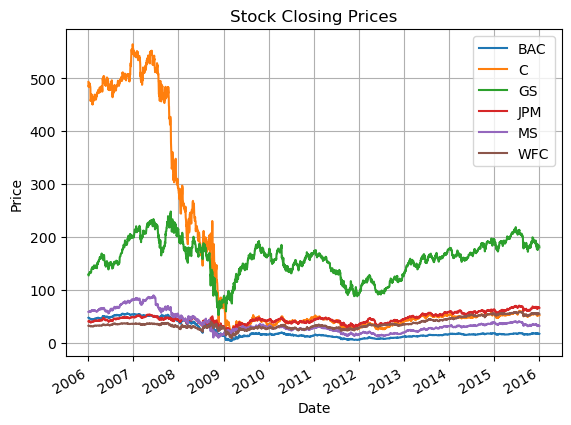

<Figure size 640x480 with 0 Axes>

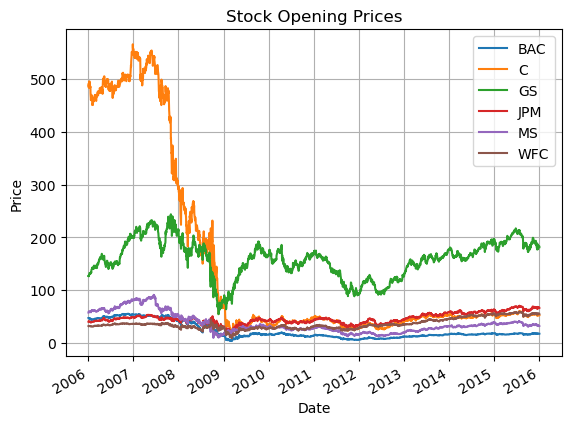

<Figure size 640x480 with 0 Axes>

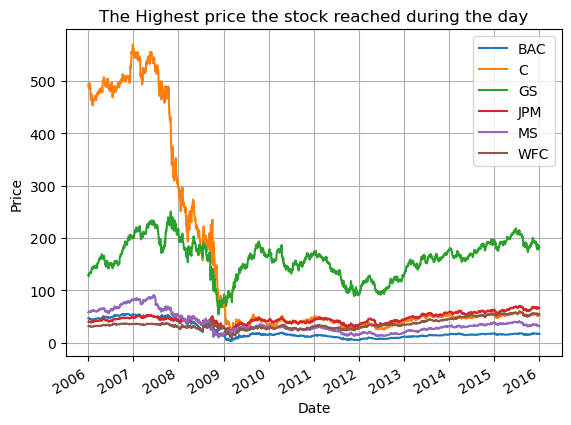

<Figure size 640x480 with 0 Axes>

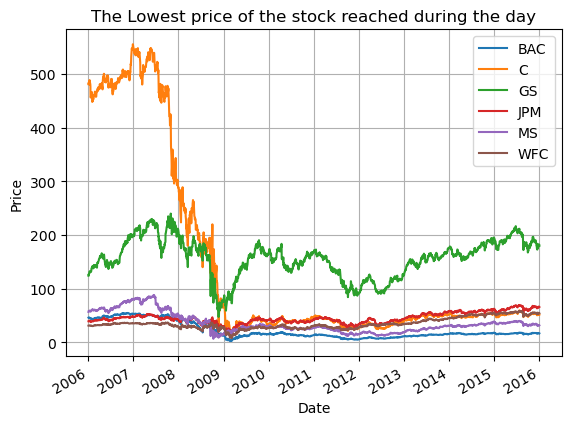

<Figure size 640x480 with 0 Axes>

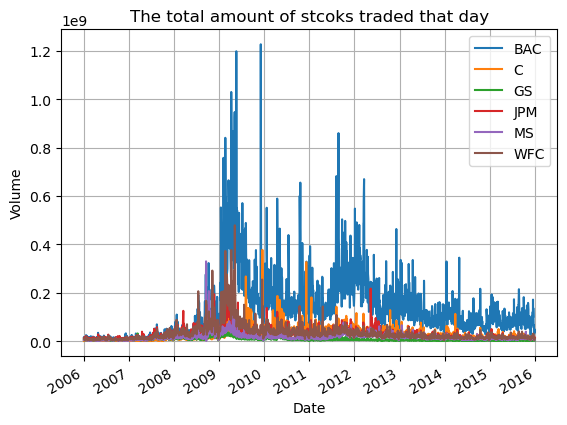

In [358]:
def plot_stock_data(stock_data):
    plt.figure(figure=(10,6))
    stock_data['Close'].plot(label='Close Price')
    plt.title('Stock Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figure=(10,6))
    stock_data['Open'].plot(label='Open Price')
    plt.title('Stock Opening Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figure=(10,6))
    stock_data['High'].plot(label='The Highest Price')
    plt.title('The Highest price the stock reached during the day')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figure=(10,6))
    stock_data['Low'].plot(label='The Lowest Price')
    plt.title('The Lowest price of the stock reached during the day')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


    plt.figure(figure=(10,6))  
    stock_data['Volume'].plot(label='Volume')
    plt.title('The total amount of stcoks traded that day')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_stock_data(DF)

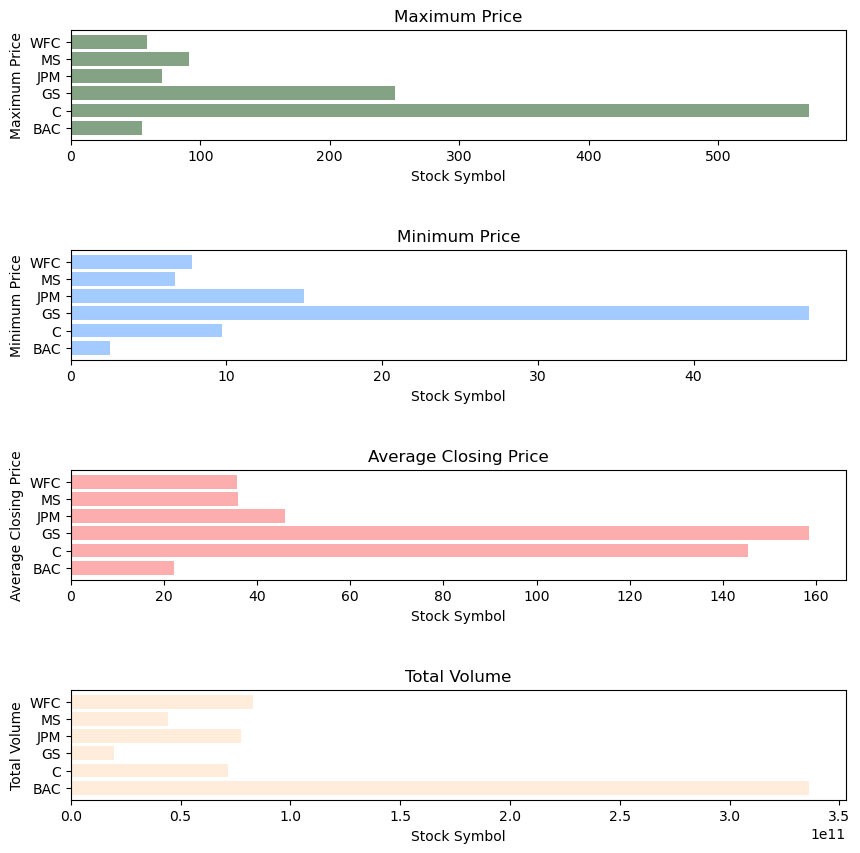

In [359]:
def plot_graph(max_price, min_price, avg_price, total_volume):
    fig, axes = plt.subplots(4, 1, figsize=(10, 10))
    plt.subplots_adjust(wspace=0.4, hspace=1) 
    
    axes[0].barh(list(max_price.keys()), list(max_price.array), color=(0.2, 0.4, 0.2, 0.6))
    axes[0].set_title('Maximum Price')
    axes[0].set_xlabel('Stock Symbol')
    axes[0].set_ylabel('Maximum Price')

    axes[1].barh(list(min_price.keys()), list(min_price.array), color=(74/255, 153/255, 255/255, 0.5))
    axes[1].set_title('Minimum Price')
    axes[1].set_xlabel('Stock Symbol')
    axes[1].set_ylabel('Minimum Price')

    axes[2].barh(list(avg_price.keys()), list(avg_price.array), color=(250/255, 92/255, 92/255, 0.5))
    axes[2].set_title('Average Closing Price')
    axes[2].set_xlabel('Stock Symbol')
    axes[2].set_ylabel('Average Closing Price')

    axes[3].barh(list(total_volume.keys()), list(total_volume.array), color=(255/255, 218/255, 185/255, 0.5))
    axes[3].set_title('Total Volume')
    axes[3].set_xlabel('Stock Symbol')
    axes[3].set_ylabel('Total Volume')
        

plot_graph(max_price, min_price, avg_price, t_volume)


#### Returns

In [360]:
returns = pd.DataFrame()

for tick in tickers:
    returns[tick+ ' Return'] = DF['Close'][tick].pct_change()

returns


,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


/home/tzi-qi/anaconda3/envs/stock_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tzi-qi/anaconda3/envs/stock_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tzi-qi/anaconda3/envs/stock_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tzi-qi/anaconda3/envs/stock_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

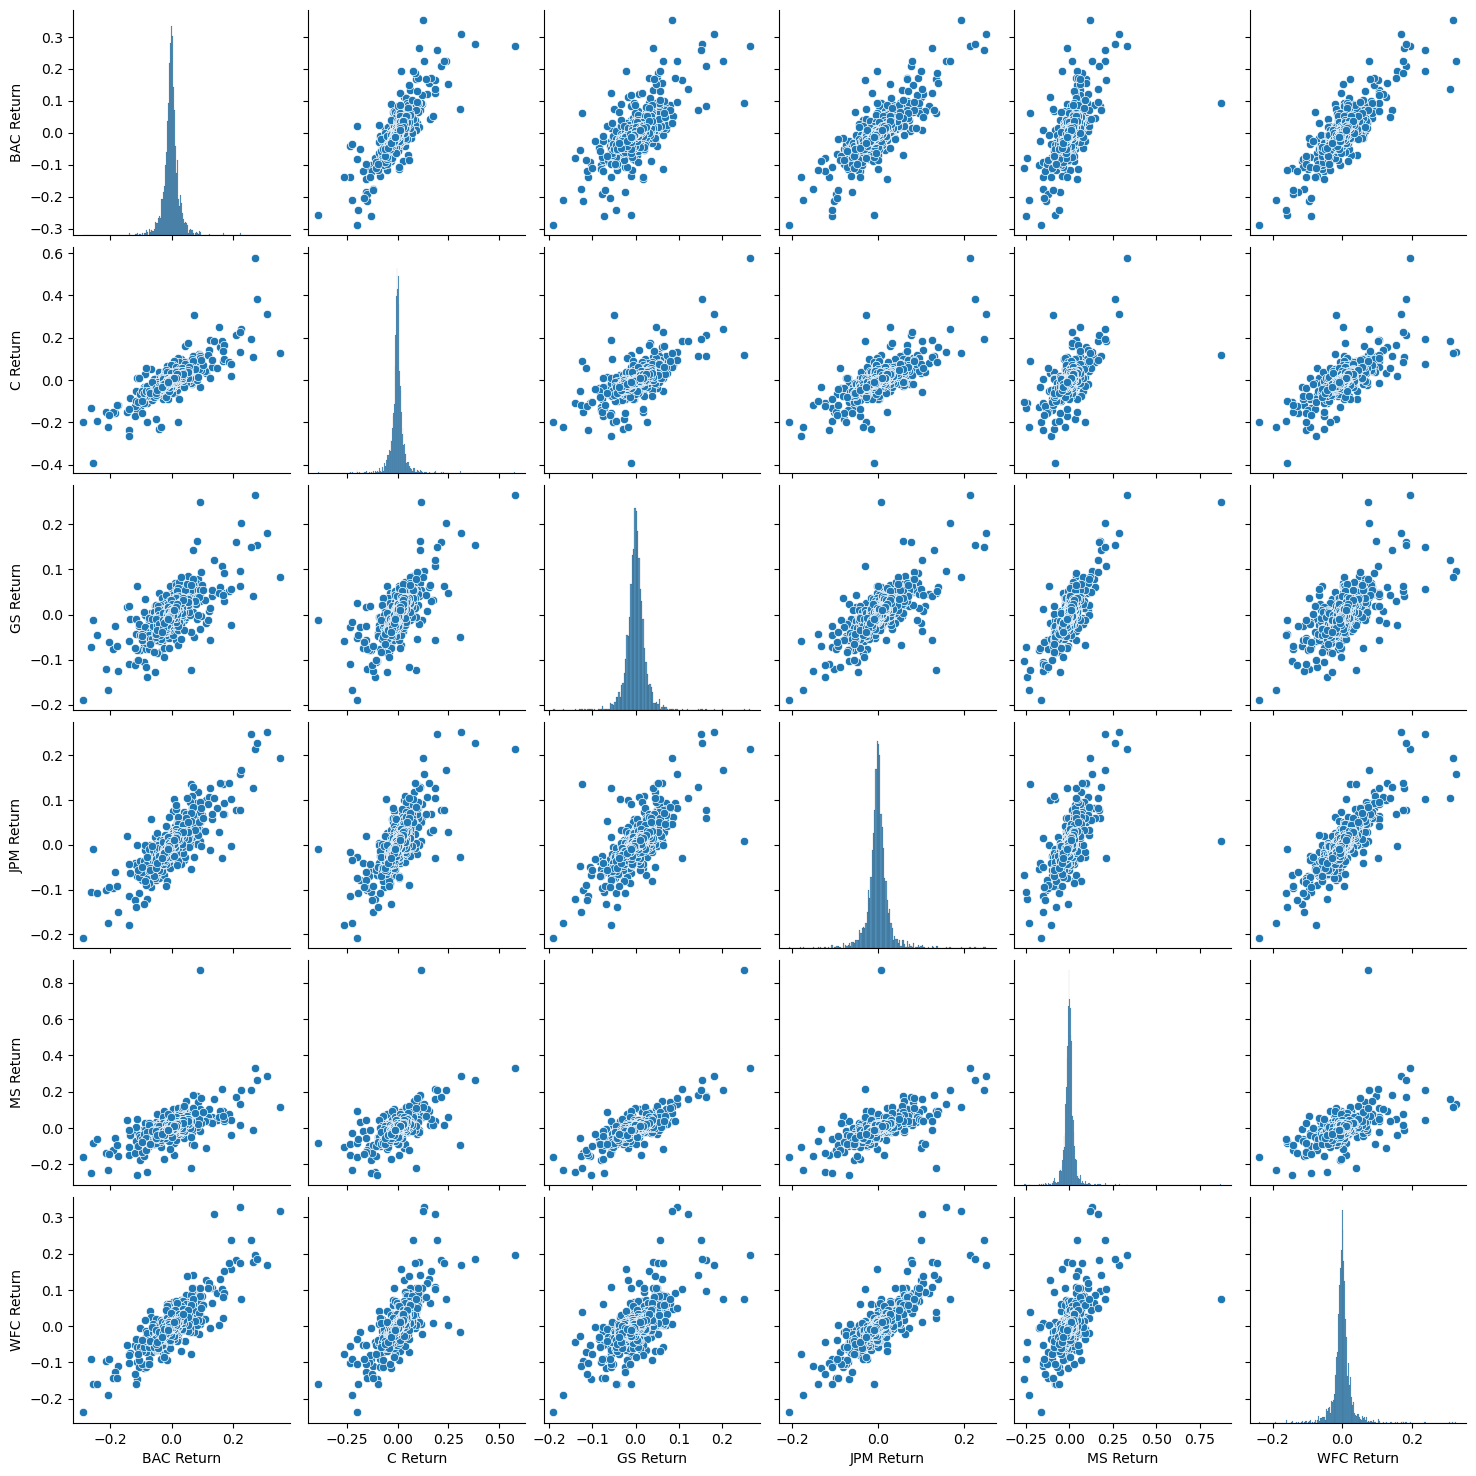

In [361]:
sns.pairplot(returns)

The day that have the "WORST DROP" in price

In [362]:
returns.min()

BAC Return   -0.289694
C Return     -0.390244
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WFC Return   -0.238223
dtype: float64

In [363]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

The day that have the "MOST GAIN"

In [364]:
returns.max()

BAC Return    0.352691
C Return      0.578249
GS Return     0.264678
JPM Return    0.250967
MS Return     0.869835
WFC Return    0.327645
dtype: float64

In [365]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Citigroup's lagest drop and biggest gain were very close to one another. This happened because Citigroup had a stock split.

What's stock spilt ? = https://www.investopedia.com/terms/s/stocksplit.asp

#### Standard Deviation of the returns

In [366]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

 Citigroup is the riskest stock as it fluctuate the most from 2006 to 2016

In [367]:
returns['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

For the year 2015, Morgan Stanley is the riskest stock since it fluctuate the most

/home/tzi-qi/anaconda3/envs/stock_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/home/tzi-qi/anaconda3/envs/stock_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tzi-qi/anaconda3/envs/stock_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tzi-qi/anaconda3/envs/stock_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tzi-qi/anaconda3/envs/stock_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

KeyboardInterrupt: 

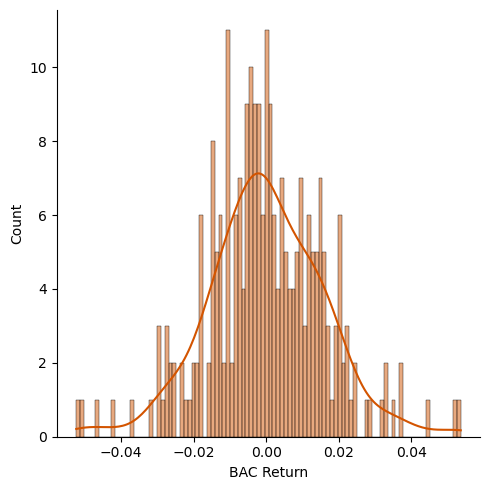

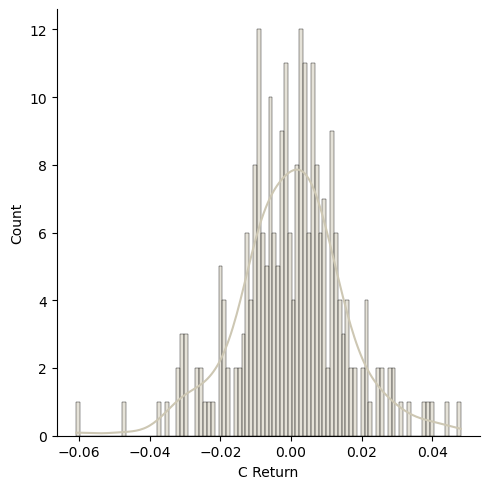

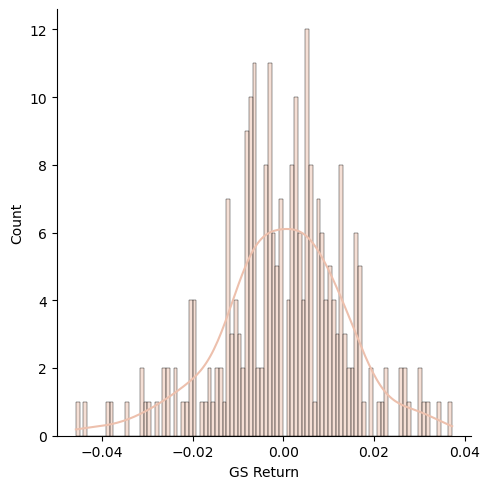

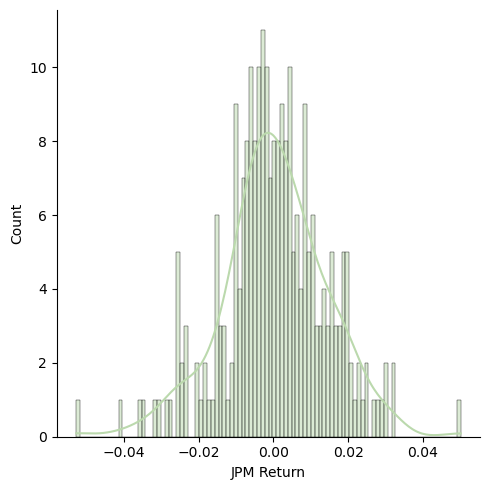

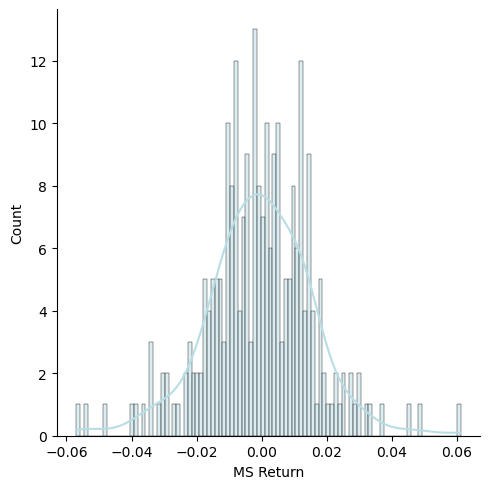

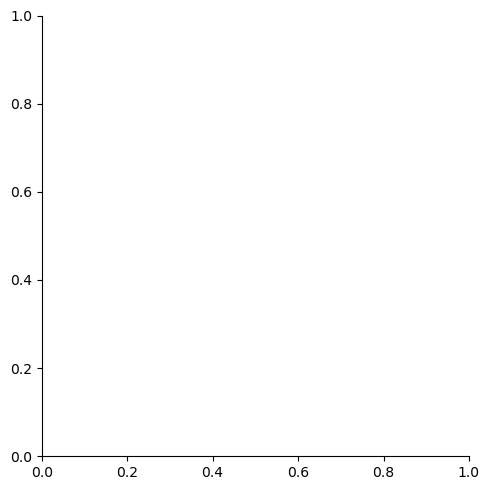

In [368]:
sns.displot(returns['2015-01-01':'2015-12-31']['BAC Return'], color=(211/255, 84/255, 0/255, 0.5), bins=100, kde=True);
sns.displot(returns['2015-01-01':'2015-12-31']['C Return'], color=(205/255, 199/255, 179/255, 0.5), bins=100, kde=True);
sns.displot(returns['2015-01-01':'2015-12-31']['GS Return'], color=(237/255, 192/255, 173/255, 0.5), bins=100, kde=True);
sns.displot(returns['2015-01-01':'2015-12-31']['JPM Return'], color=(187/255, 217/255, 173/255, 0.5), bins=100, kde=True);
sns.displot(returns['2015-01-01':'2015-12-31']['MS Return'], color=(184/255, 221/255, 228/255, 0.5), bins=100, kde=True);
sns.displot(returns['2015-01-01':'2015-12-31']['WFC Return'], color=(220/255, 197/255, 2/255, 0.5), bins=100, kde=True);

In [ ]:
DF.xs('Close', axis=1).corr()

,BAC,C,GS,JPM,MS,WFC
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


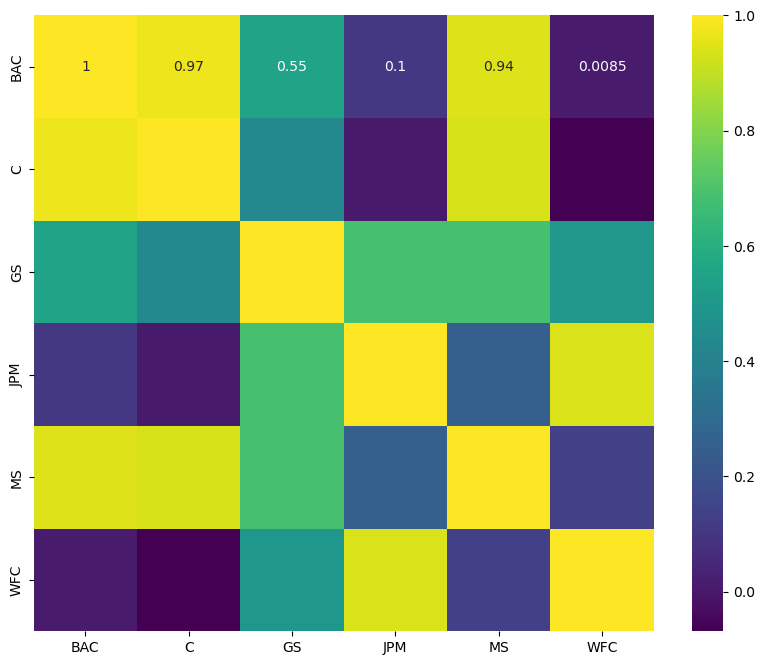

In [377]:
plt.figure(figsize = (10,8))
sns.heatmap(DF.xs('Close', axis=1).corr(), cmap = 'viridis',annot=True)
plt.show()